# Car Price Prediction

This Dataset is take from kaggle : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
and contains the information about the used cars from cardekho.com 

In [43]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA (Exploratory Data Analysis)

In [51]:
# Finding the Categorical Variables 

print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [52]:
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Owner'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [53]:
# checking the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [55]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [56]:
# Removing the Car Name column because it is not required 

final_dataset = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
               'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [57]:
df = df[final_dataset]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
df['Current Year'] = 2020 #Adding a new column and adding 2020 

In [59]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [60]:
df['no_year'] = df['Current Year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [61]:
# Dropping the year and current year because we already create a derived feature from these 2 features.
df.drop(['Year','Current Year'],axis=1,inplace=True)

In [62]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


There are 4 Categorical variables with very less number of categories so we need to convert them into the numerical variables.

In [63]:
# One Hot Encoding

df = pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [64]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


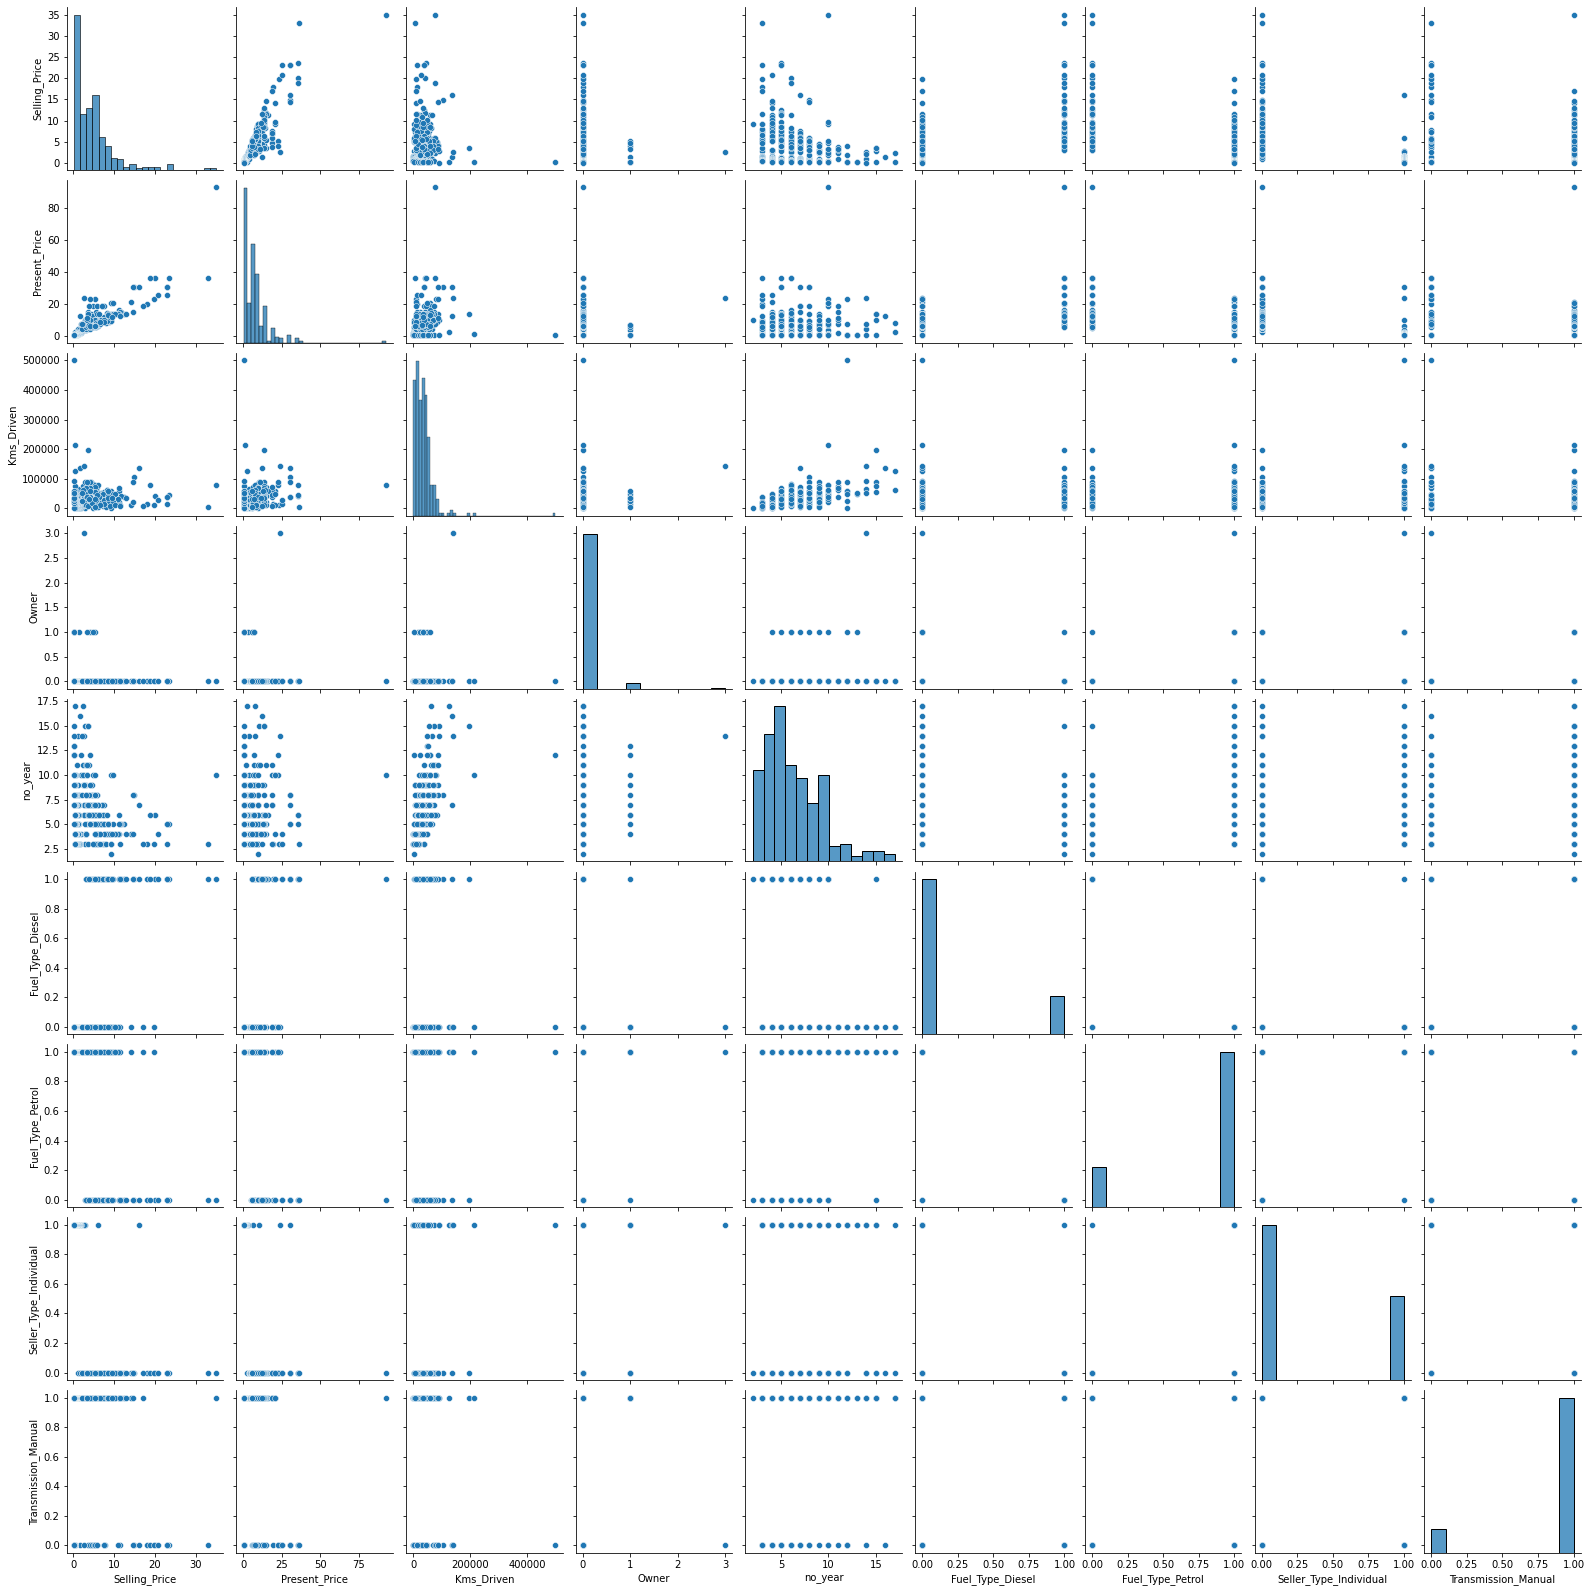

In [67]:
sns.pairplot(df)

By this Pairplot it doesnot give much information so lets visualize it with some other techniques!

<AxesSubplot:>

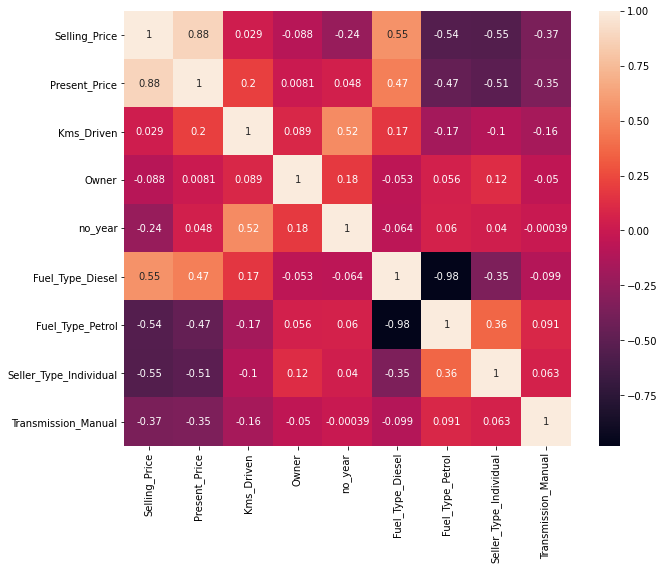

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True) # This uses pearson co relation.

In [69]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [70]:
# Dividing into independent and dependent features..

X = df.iloc[:,1:]
y = df.iloc[:,0]


In [71]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [72]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Feature Selection

Since in this dataset we are having very less number of features so we wont be dropping any features ...but only visualizing the top 5 important features.

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [74]:
print(model.feature_importances_)

[0.3574388  0.04330256 0.00087054 0.07299986 0.23978039 0.00729596
 0.1292149  0.149097  ]


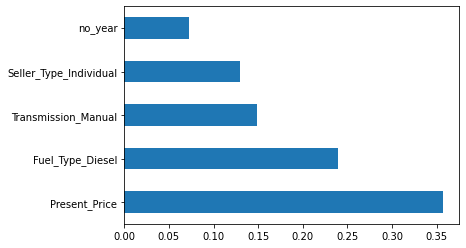

In [79]:
feat_imp = pd.Series(model.feature_importances_,index = X.columns) # converting into series 
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [81]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [83]:
X_train.shape , X_test.shape

((240, 8), (61, 8))

# Model Building

In [104]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [105]:
[int(x) for x in np.linspace(100,1300,13)]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]

In [106]:
[int(x) for x in range(1,14)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

### Hyperparameter Tuning

In [107]:
# HyperParameter Training

# How many Decision trees will it use internally
n_estimators = [int(x) for x in np.linspace(100,1300,13)]

# Till what depth my randomforest model will be creating Decision Trees
max_depth = [int(x) for x in np.linspace(5,30,6)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# No. of samples required to split the node
min_samples_split = [2,5,10,15,100]

# Minimum no. of samples required in a leaf
min_samples_leaf = [1,2,5,10]




In [108]:
# creating random grid

random_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'max_features' : max_features,
    'min_samples_leaf' : min_samples_leaf,
    'min_samples_split' : min_samples_split,
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [109]:
# Creating the object of Random Forest Model
random_forest = RandomForestRegressor()

In [110]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomizedSearchCV(estimator=random_forest,
                        param_distributions=random_grid,
                        n_jobs=-1,
                        n_iter=10,
                        cv=5,
                        random_state=42,
                        scoring='neg_mean_squared_error',
                        verbose=2)

In [111]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [112]:
rf.best_params_ # so these are the Best possible parameters that my model took.

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

# Prediction

In [113]:
predictions = rf.predict(X_test)
predictions

array([24.4638147 ,  3.88450932,  5.25702044,  4.47329749,  0.70724162,
        5.6011211 ,  1.1419494 ,  0.96495278,  0.2208773 ,  5.67739083,
        5.58902805,  8.73497602,  3.86845952,  9.8384506 ,  5.62966694,
        8.99245288,  3.46710357,  2.96480505,  0.41016679,  1.1002994 ,
        7.23599403,  4.97896329,  0.49930655,  0.26452627,  0.60380389,
        0.49700762,  9.5125246 ,  2.96925505,  1.01260111,  2.74800952,
       10.53413266,  5.10404432,  4.11651098,  4.38526711,  0.93929702,
        0.56793452,  9.74823702,  1.00202361,  0.40128147, 17.68650934,
        0.72627369,  2.56442785,  0.54433357,  2.53910298,  5.34862996,
       14.3725328 ,  4.46189571,  3.95889107, 25.9074125 , 19.56316135,
        5.32538234,  0.53579365,  0.45896504,  2.91192242,  5.8594592 ,
        5.81257477,  1.14564016,  0.44781317,  1.55962758,  0.46634929,
        0.19957802])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

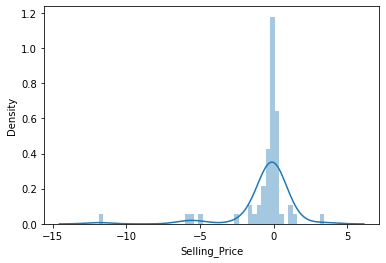

In [115]:
sns.distplot(y_test-predictions)

In [121]:
from sklearn import metrics
metrics.r2_score(y_test,predictions) #

0.8181815006440513

<AxesSubplot:xlabel='Selling_Price'>

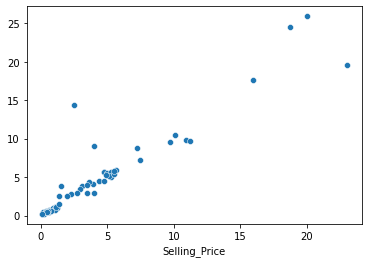

In [124]:
sns.scatterplot(x=y_test,y=predictions)

## Dumping into Pickle file

In [127]:
import pickle

# First Creating a pickle file
file = open('random_forest_regression_model.pkl','wb')

# Second Dumping my model into this pickle file created
pickle.dump(rf,file)

In this order only we need to give our input to our model from the UI.

In [128]:
X_train.columns 

Index(['Present_Price', 'Kms_Driven', 'Owner', 'no_year', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')